# Stack Overflow Developer Survey 2020

## Installations

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Data Loading

In [6]:
survey_raw_df = pd.read_csv("developer_survey_2020/survey_results_public.csv")

In [7]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [8]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [9]:
schema_fname = "developer_survey_2020/survey_results_schema.csv"

In [10]:
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

## Data Preparation and Cleaning

In [11]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    #Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'NEWOvertime',
    'NEWEdImpt'
]

In [12]:
survey_df = survey_raw_df[selected_columns].copy()

In [13]:
schema = schema_raw[selected_columns]

In [14]:
survey_df.shape

(64461, 19)

In [15]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [16]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')

In [17]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,57473.000000,57473.000000,41151.000000
mean,30.834111,15.476572,15.476572,15.476572,40.782174
std,9.585392,5.114081,5.114081,5.114081,17.816383
min,1.000000,5.000000,5.000000,5.000000,1.000000
25%,24.000000,12.000000,12.000000,12.000000,40.000000
50%,29.000000,15.000000,15.000000,15.000000,40.000000
75%,35.000000,18.000000,18.000000,18.000000,44.000000
max,279.000000,85.000000,85.000000,85.000000,475.000000


Here we can see that minimum age is 1 and maximum is 279 which is not genuine. So in this data we are taking age from 10-100 years only and deleting every other data.

In [18]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

Also goes for WorkWeekHours, deleting all the values > 140 hours 

In [19]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In gender we are removing values containing more than one option.

In [20]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [21]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [22]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,NEWOvertime,NEWEdImpt
48263,Belgium,30.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,14.0,14.0,14.0,C#;HTML/CSS;JavaScript,C#;C++;Go;HTML/CSS;JavaScript;Rust;Swift,Once every few years,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",NaN,NaN,NaN,Fairly important
7396,Portugal,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fine arts or performing arts (such as graphic ...,Yes,23.0,23.0,23.0,HTML/CSS;JavaScript,HTML/CSS;JavaScript;TypeScript,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, front-end;Developer, full-stack",25.0,Slightly satisfied,Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
46852,Argentina,27.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,10.0,10.0,10.0,C#;Java;SQL,C#;Java;SQL,Every few months,Call a coworker or friend;Go for a walk or oth...,Employed full-time,"Developer, back-end;Developer, game or graphic...",40.0,Neither satisfied nor dissatisfied,Sometimes: 1-2 days per month but less than we...,Fairly important
36792,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,11.0,11.0,11.0,C;C++;HTML/CSS;Java;JavaScript;PHP;SQL;TypeScript,Python;Ruby;Swift,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,Somewhat important
33008,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A social science (such as anthropology, psycho...",No,21.0,21.0,21.0,HTML/CSS;JavaScript,Go;JavaScript;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, front-end;Developer, full-stack",40.0,Very satisfied,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
18994,United States,29.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)",Mathematics or statistics,Yes,15.0,15.0,15.0,Julia,Julia,Once every few years,Do other work and come back later,Employed full-time,Academic researcher;Data scientist or machine ...,80.0,Very satisfied,Often: 1-2 days per week or more,Critically important
58581,Portugal,47.0,Man,Some college/university study without earning ...,"A business discipline (such as accounting, fin...",No,14.0,14.0,14.0,C#;SQL,C#;SQL,Once every few years,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Database administrator;Developer, back-end;Dev...",45.0,Very dissatisfied,Often: 1-2 days per week or more,Very important
50769,United States,45.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,11.0,11.0,11.0,C#;HTML/CSS;JavaScript;SQL;TypeScript,NaN,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Product manager,50.0,Very satisfied,Often: 1-2 days per week or more,Critically important
5429,Indonesia,48.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,21.0,21.0,21.0,HTML/CSS;Ruby;TypeScript,HTML/CSS;Ruby;TypeScript,Once every few years,Visit Stack Overflow;Watch help / tutorial videos,"Independent contractor, freelancer, or self-em...","Developer, full-stack",40.0,Very dissatisfied,Occasionally: 1-2 days per quarter but less th...,Fairly important
61706,Germany,NaN,Man,Primary/elementary school,NaN,Yes,9.0,9.0,9.0,C;C++;HTML/CSS;Java;Objective-C;SQL,NaN,NaN,Play games;Visit Stack Overflow;Watch help / t...,Student,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

## 1. Country

Plot 10 countries with the highest number of responses.

In [23]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [24]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

Visualizing using a bar chart

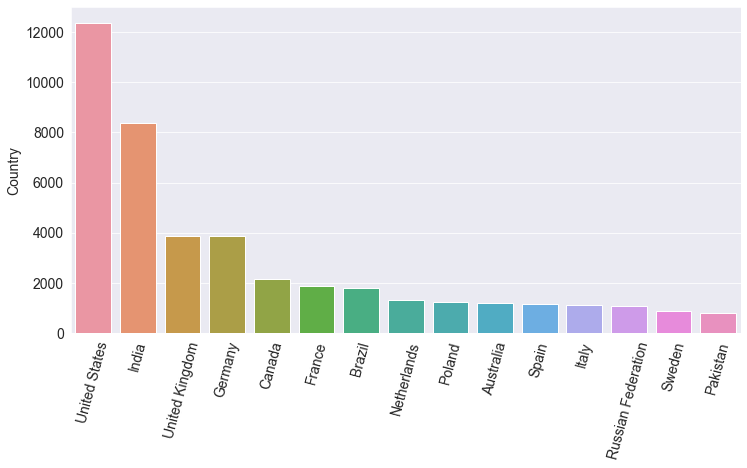

In [25]:
plt.figure(figsize=(12, 6));
plt.xticks(rotation=75);
sns.barplot(x=top_countries.index, y=top_countries);

Very high responses from India and US, which one might expect since these countries have the highest population and also because of survey being in English which is the most most common langage in India and US.

## Age

Age of different respondents.

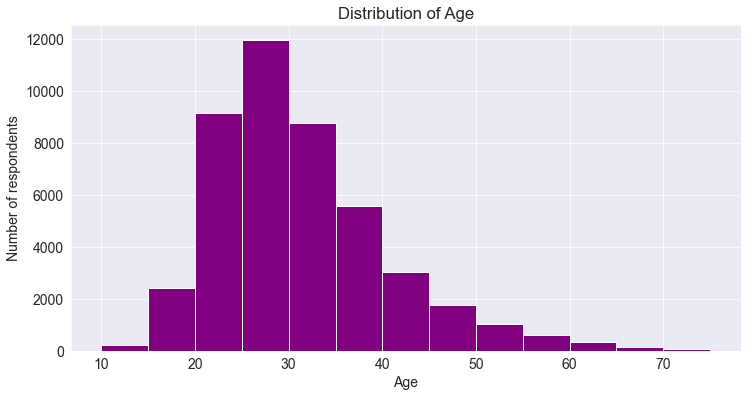

In [26]:
plt.figure(figsize=(12,6));
plt.title("Distribution of Age");
plt.xlabel("Age");
plt.ylabel("Number of respondents");

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

A lot of respondents are from the age 20-40 which is very significant in the case of programming community.

## Gender 

In [27]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

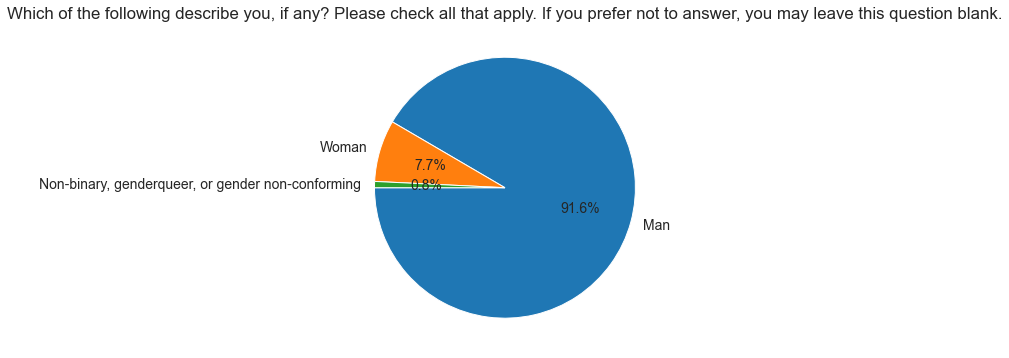

In [28]:
plt.figure(figsize=(12, 6));
plt.title(schema.Gender);
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

This survey shows that in the programming community males have dominated females significantly.

## Education Level

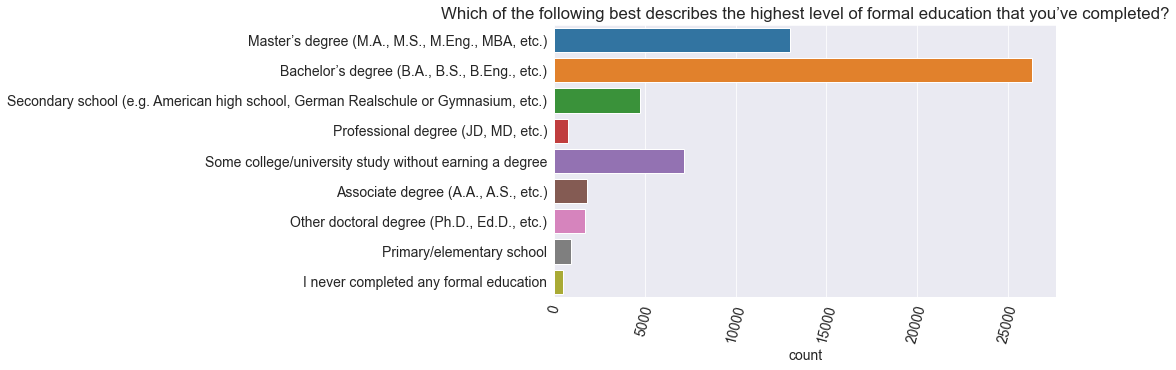

In [29]:
sns.countplot(y=survey_df.EdLevel);
plt.xticks(rotation=75);
plt.title(schema['EdLevel']);
plt.ylabel(None);

It shows that most of the programmers are bachelors degree holders but there is no significant sign that they are computer science degree holders.

Undergrad Major Analysis

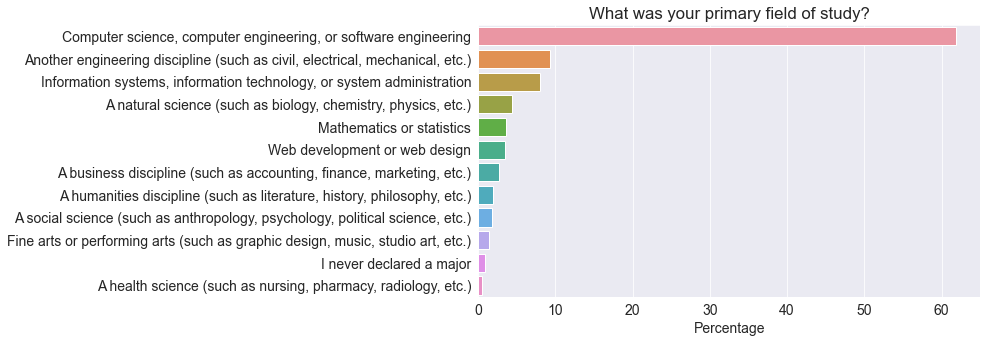

In [30]:
undergrad_pct = survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count()
sns.barplot(x=undergrad_pct, y=undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.ylabel(None)
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science

## Employment

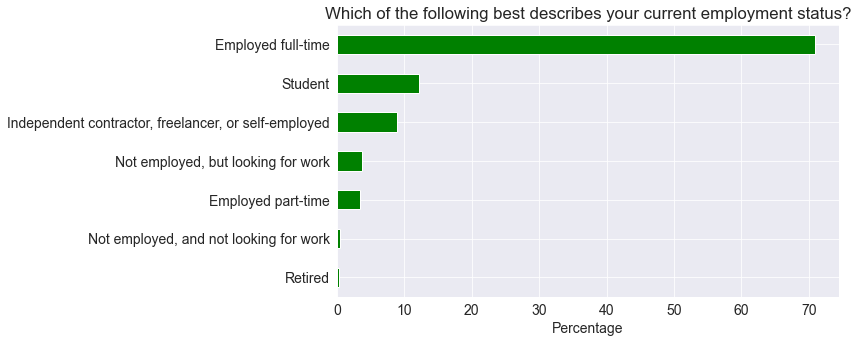

In [31]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

### Dev Type

In [32]:
schema.DevType   

'Which of the following describe you? Please select all that apply.'

In [33]:
survey_df.DevType.value_counts()   

Developer, full-stack                                                                                                                                                                     4396
Developer, back-end                                                                                                                                                                       3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                            2214
Developer, back-end;Developer, full-stack                                                                                                                                                 1465
Developer, front-end                                                                                                                                                                      1390
                                             

This function will help to breakdwon multiple answers

In [34]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [35]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [36]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

### Q.  What are the most popular programming language in 2020 ?

We can use the LanguageWorkedWith column. Similar to DevType, respondents were allowed to choose multiple options here.

In [38]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [39]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [40]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
languages_worked_percentages  = languages_worked_df.mean().sort_values(ascending=False)*100
languages_worked_percentages 

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

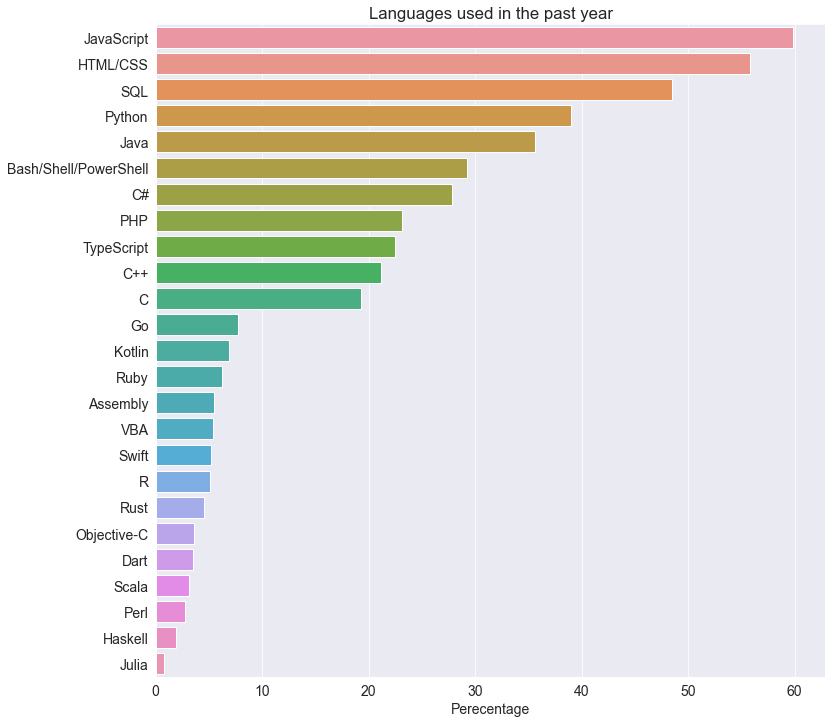

In [42]:
plt.figure(figsize=(12,12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('Perecentage');

### Q. Which languages are the most people interested to learn over the next year?

We can use the LanguageDesireNextYear column, with similar processing as the previous one.

In [ ]:
survey_df.LanguageDesireNextYear

In [ ]:
languages_interested_df  = split_multicolumn(survey_df.LanguageDesireNextYear)

In [ ]:
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False)*100
languages_interested_percentages

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

### Q.  In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [ ]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [ ]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [ ]:
high_response_countries_df

### Q:  How important is it to start young to build a career in programming?

In [ ]:
schema.YearsCodePro

In [ ]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.